# From semantic to instance segmentation

The goal of this model is to produce instance segmentation for images starting from the semantic segmentation.

Desirable characteristics:
- speed
- simplicity

This model is trained and evaluated on the PASCAL VOC 2012 dataset. More datasets will be added in the future.

In [5]:
#standard library modules

#third party modules
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as T

#my own modules

#set plt sizes
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [10]:
#root directory of dataset in my pc
dset_root = "/home/cyrus/Documents/datasets"

#dataset transform parameters
IMG_SIZE = 256

#create dataset transforms if any
resize_transform = T.Compose([T.Resize((IMG_SIZE, IMG_SIZE)), T.ToTensor()])

#create datasets for train and val
VOC_train = dset.VOCSegmentation(dset_root,
                                 image_set = "train",
                                 transform = resize_transform,
                                 target_transform = resize_transform)
VOC_val = dset.VOCSegmentation(dset_root,
                               image_set = "val",
                               transform = resize_transform,
                               target_transform = resize_transform)

#dataloader parameters
batch_size = 16
n_workers = 1

#create dataloaders
#TODO: check performance of pin_memory and num_workers
loader_train = DataLoader(VOC_train,
                          batch_size = batch_size,
                          shuffle = False,
                          num_workers = n_workers,
                          pin_memory = True)
loader_val = DataLoader(VOC_val,
                        batch_size = batch_size,
                        shuffle = False,
                        num_workers = n_workers,
                        pin_memory = True)

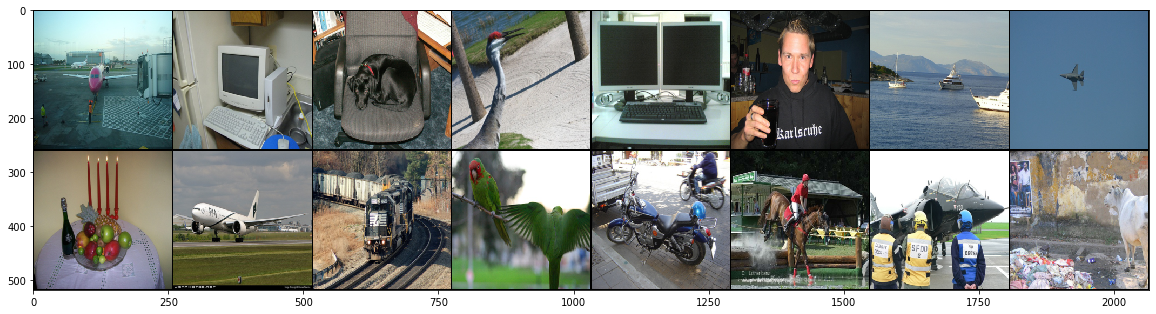

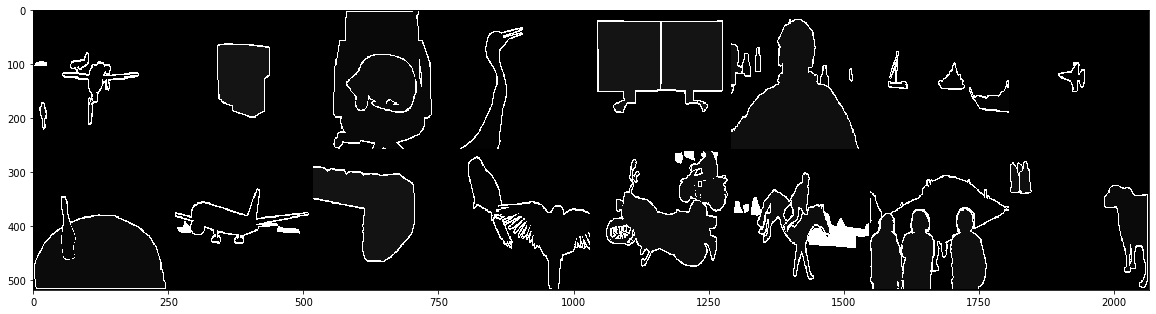

In [11]:
#get an example batch from the training set
dataiter = iter(loader_train)
samples, labels = next(dataiter)

#plot samples
grid = torchvision.utils.make_grid(samples)
plt.imshow(np.transpose(grid, (1,2,0)))
plt.show()
#plot labels
grid = torchvision.utils.make_grid(labels)
plt.imshow(np.transpose(grid, (1,2,0)))
plt.show()

#NOTA BENE: these are class segmentation images, NOT INSTANCE!